In [ ]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch.nn as nn
import torch

from utils import MnistData
from models import ModelManager, ModelType

In [5]:
max_norm = 50 / 255

In [4]:
model = ModelManager.get_trained(ModelType.MnistCnnB)

In [6]:
batch_size = 10

In [7]:
data = MnistData(True)

In [8]:
def fgsm(benign_examples: torch.Tensor, labels: torch.Tensor) -> torch.Tensor:
    loss_fn = nn.CrossEntropyLoss()
    benign_examples = benign_examples.detach()
    benign_examples.requires_grad = True
    if benign_examples.grad is not None:
        benign_examples.grad.zero_()
    loss = loss_fn(model(benign_examples), labels)
    loss.backward()
    print('Gradient:')
    print(benign_examples.grad)
    adversarial_examples = benign_examples + max_norm * benign_examples.grad.apply_(lambda x: 1 if x >= 0 else -1)
    return MnistData.clip_for_image(adversarial_examples)

In [9]:
benign_examples, labels = data.draw_first(batch_size, model)

Následující buňka má gradient malý, ale nenulový

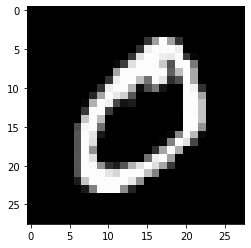

Gradient:
tensor([[[[-4.9228e-42, -8.0827e-42, -1.3562e-41, -1.0323e-41,  2.8516e-42,
            1.1245e-41,  1.4040e-41,  6.7430e-42, -6.6381e-41, -1.0489e-40,
           -1.6248e-40, -1.0168e-40, -1.2030e-40,  6.8818e-42,  1.5470e-41,
            6.2767e-41,  9.4218e-41,  6.9804e-41,  4.0820e-41,  1.2295e-41,
           -9.4504e-42, -1.3782e-41, -6.5506e-41, -5.9470e-41, -9.1330e-41,
           -2.9612e-41, -3.5112e-41,  0.0000e+00],
          [-1.7124e-42, -5.9737e-42,  2.8502e-42, -1.1502e-41, -3.5635e-42,
           -1.2857e-41, -5.5351e-43, -2.9750e-41, -7.7420e-41, -1.0712e-40,
           -1.9311e-40, -1.0069e-40, -5.8841e-42,  4.9226e-41,  8.3098e-41,
            6.2536e-41,  7.4747e-41,  8.3932e-41,  2.5683e-41,  1.6018e-41,
           -1.6481e-41, -4.1387e-41, -8.3824e-41, -6.3421e-41, -4.6049e-41,
           -2.6590e-41, -3.7835e-42,  0.0000e+00],
          [ 1.4901e-41,  3.5593e-41,  1.3433e-40,  1.1863e-40,  2.6010e-40,
            1.6498e-40,  2.5660e-40,  1.5086e-40,  3

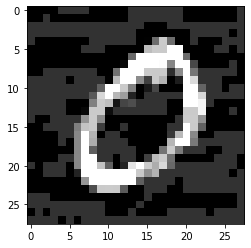

In [10]:
i = 0
MnistData.display(benign_examples[i], scale=True)
MnistData.display(fgsm(benign_examples[i].unsqueeze(0), labels[i].unsqueeze(0)), scale=True)

Následující buňka má gradient identicky roven nule.
Stejný kód, jen jiný vzorek.

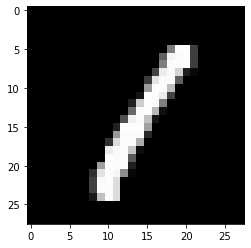

Gradient:
tensor([[[[ 0.0000e+00,  0.0000e+00, -1.1764e-25, -2.0639e-25,  8.8903e-25,
            1.8587e-24,  4.0278e-24,  3.8122e-24,  3.2715e-24, -1.9904e-24,
           -8.5845e-24, -1.0853e-23, -2.0884e-23, -1.4486e-23, -1.6240e-23,
           -5.3490e-25,  1.5963e-24,  1.5073e-23,  2.0455e-23,  1.1127e-23,
            1.9308e-23,  7.3463e-24,  6.3533e-24, -1.0806e-24, -1.8143e-24,
           -1.1385e-24, -1.3500e-24,  0.0000e+00],
          [ 0.0000e+00,  0.0000e+00, -1.3667e-26, -1.5161e-25,  2.7071e-25,
            1.0067e-24,  1.8806e-24,  2.5907e-24,  6.8088e-25,  1.4220e-24,
           -4.8355e-24, -6.3648e-24, -1.7236e-23, -1.6626e-23, -1.5753e-23,
            7.5872e-24,  5.6067e-23,  7.1575e-23,  7.9057e-23,  6.5582e-23,
            2.4513e-23,  5.3278e-24,  1.2057e-24,  2.5638e-26, -1.9778e-24,
           -5.5916e-25, -2.1437e-25,  0.0000e+00],
          [ 0.0000e+00,  0.0000e+00,  5.8220e-25,  1.1594e-24,  7.9735e-25,
           -4.7387e-24, -1.7776e-23, -2.0132e-23, -3

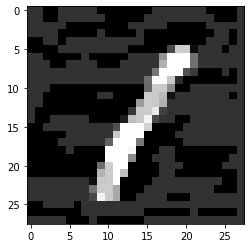

In [11]:
j = 2
MnistData.display(benign_examples[j], scale=True)
MnistData.display(fgsm(benign_examples[j].unsqueeze(0), labels[j].unsqueeze(0)), scale=True)